In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2

train,test = x[0:1000], x[1000:]

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.jpijnswnnan3ce6lli5fwsphut2vxmth.gfortran-win_amd64.dll
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
train_step = 10
test_step = 20

trainX,trainY =convertToDataset(train,train_step)
testX,testY =convertToDataset(test,test_step)

trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [4]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(480, 20, 1)


In [5]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(None, 1),  activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.input

<KerasTensor: shape=(None, None, 1) dtype=float32 (created by layer 'simple_rnn_input')>

In [8]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
62/62 - 1s - loss: 0.4744
Epoch 2/100
62/62 - 0s - loss: 0.4107
Epoch 3/100
62/62 - 0s - loss: 0.4077
Epoch 4/100
62/62 - 0s - loss: 0.3987
Epoch 5/100
62/62 - 0s - loss: 0.3945
Epoch 6/100
62/62 - 0s - loss: 0.3835
Epoch 7/100
62/62 - 0s - loss: 0.3897
Epoch 8/100
62/62 - 0s - loss: 0.3843
Epoch 9/100
62/62 - 0s - loss: 0.3884
Epoch 10/100
62/62 - 0s - loss: 0.3757
Epoch 11/100
62/62 - 0s - loss: 0.3769
Epoch 12/100
62/62 - 0s - loss: 0.3782
Epoch 13/100
62/62 - 0s - loss: 0.3706
Epoch 14/100
62/62 - 0s - loss: 0.3693
Epoch 15/100
62/62 - 0s - loss: 0.3748
Epoch 16/100
62/62 - 0s - loss: 0.3706
Epoch 17/100
62/62 - 0s - loss: 0.3731
Epoch 18/100
62/62 - 0s - loss: 0.3596
Epoch 19/100
62/62 - 0s - loss: 0.3711
Epoch 20/100
62/62 - 0s - loss: 0.3584
Epoch 21/100
62/62 - 0s - loss: 0.3640
Epoch 22/100
62/62 - 0s - loss: 0.3541
Epoch 23/100
62/62 - 0s - loss: 0.3526
Epoch 24/100
62/62 - 0s - loss: 0.3529
Epoch 25/100
62/62 - 0s - loss: 0.3577
Epoch 26/100
62/62 - 0s - loss: 0.

In [9]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.07637295871973038


In [10]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

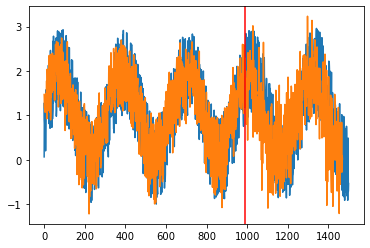

In [11]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()